In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO


In [5]:
wd = 'D:/Projects/Watersheds/Green/Analysis'
os.chdir(wd)

In [7]:
df=pd.read_csv('output.gslib', delim_whitespace=True,skiprows=3,header=None)
np.shape(df.values)


(553350, 1)

In [25]:
h = np.reshape(df.values, (930, 595))
fh = np.flip(h, axis=0)

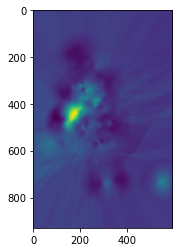

In [26]:
plt.imshow(fh, interpolation='none')
# plt.gca().invert_yaxis()
plt.show()

In [27]:
ncols = 595
nrows = 930
xllcorner = -1197050
yllcorner = 2081067
cellsize = 300
noDATA = -999

In [29]:

f = StringIO()
np.savetxt(f, fh, fmt='%.3f')
f.seek(0)
fs = f.read().replace('-9999.000', '-9999', -1)
f.close()
f = open('init_result.asc', 'w')
f.write("ncols " + str(ncols) + "\n")
f.write("nrows " + str(nrows) + "\n")
f.write("xllcorner " + str(xllcorner) + "\n")
f.write("yllcorner " + str(yllcorner) + "\n")
f.write("cellsize " + str(cellsize) + "\n")
f.write("NODATA_value " + str(noDATA) + "\n")
f.write(fs)
f.close()